## **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Reading the files**

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## **Shape of the dataset**

In [3]:
print("The shape of the train_dataset is: {} rows and {} columns".format(train_data.shape[0], train_data.shape[1]))

The shape of the train_dataset is: 891 rows and 12 columns


## **Quick view of data**

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The meaning of each attribute is the following:

**PassengerId**: the ID given to each passenger<br>
**Survived**: the target attribute (1 for passengers who survived, 0 for those who didn't)<br>
**Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class)<br>
**Name, Sex, Age**: Name of the person, Gender of the person, Age of the person<br>
**SibSp**: Number of siblings & spouses aboard the Titanic<br>
**Parch**: Number of parents & children aboard the Titanic<br>
**Ticket**: Ticket number<br>
**Fare**: Passenger fare (in pounds)<br>
**Cabin**: Passenger's cabin number<br>
**Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Exploratory Data Analysis (EDA)

For **Numerical Columns**

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Things To Note:-**<br>
1) **Age** has **null** values.<br>
2) Only **38** percent of people **survived**.<br>
3) **Mean** and **Median** of the **Age** is approx **30** and **28**.<br>
4) **Mean Fare** is about **32.2 euros**.<br>
5) **Minimum Age** is **0.42 years** and **Maximum Age** is **80 years**.<br> 
#### **NOTE:-** These all attributes have different scales

### Finding the correlation 

In [6]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Showing that the numerical columns have different scales

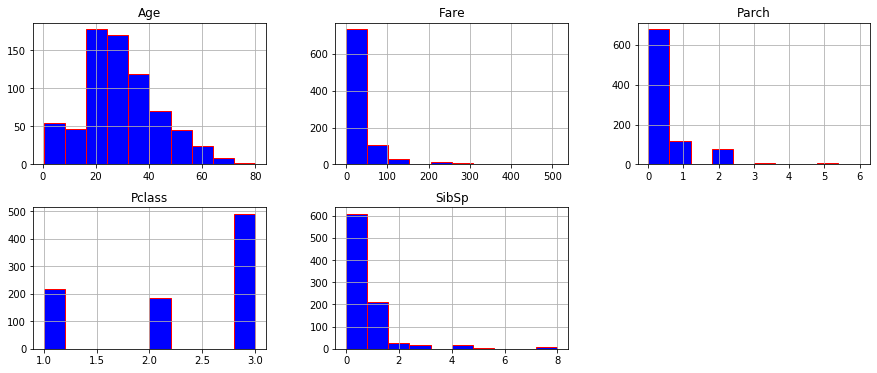

In [7]:
numerical_attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train_data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 3));

**Things to note down:-**<br>
1) Dividing the age in two categories, young where **age<40** and old where **age>40** because the probability of survival is high for people having age<40.<br>
2) **Approx 700** people **less paid** for trip.<br>
3) **More than 600** people has **no parent** on board and **no sibling** on board with them.<br>
4) **Approx 500** people has 3rd ticket class which is highest amoung others.<br>

In [8]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Risien, Mr. Samuel Beard",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It is telling **How many non-null values** are there and **What is the Datatype** of each feature

## **Calculating the missing values.**

In [10]:
missing_values = train_data.isnull().sum().sort_values(ascending = False)
print(missing_values)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [11]:
percent_missing = ((train_data.isnull().sum() / train_data.shape[0]) * 100).sort_values(ascending = False)
print(percent_missing)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64


In [12]:
missing_data = pd.concat([missing_values, percent_missing], axis = 1, keys = ['Counts', '%'])
missing_data

,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


## **Displaying the percentage of missing values by column**

In [13]:
display(missing_data.style.background_gradient(cmap = 'Greens', axis = 0))

,Counts,%
Cabin,687,77.1044
Age,177,19.8653
Embarked,2,0.224467
Fare,0,0
Ticket,0,0
Parch,0,0
SibSp,0,0
Sex,0,0
Name,0,0
Pclass,0,0


## **Displaying the overall missing percentage values**

In [14]:
miss_values = train_data.isnull().sum()
total_cells = np.product(train_data.shape)
total_missing = miss_values.sum()
miss = (total_missing/total_cells)*100
print("Overall Missing Percentage Value: {} %".format(miss))

Overall Missing Percentage Value: 8.099513655069211 %


## Filling missing values using bfill method

In [15]:
train_data = train_data.fillna(method = 'bfill', axis = 0).fillna(0)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


## Showing that, now there are no null values

In [16]:
missing_values = train_data.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Data Visualization

### 1) Pclass Attribute

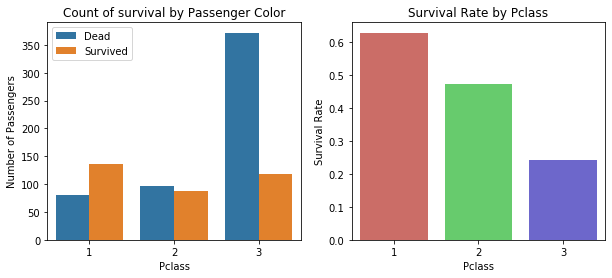

In [17]:
fig, (graph1, graph2) = plt.subplots(1,2, figsize = (10,4))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, palette = 'tab10', ax = graph1)
graph1.set_title('Count of survival by Passenger Color')
graph1.set_xlabel('Pclass')
graph1.set_ylabel('Number of Passengers')
graph1.legend(labels = ['Dead', 'Survived']);

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, palette = 'hls', ci = None, ax  =graph2)
graph2.set_title('Survival Rate by Pclass')
graph2.set_xlabel('Pclass')
graph2.set_ylabel('Survival Rate');

In [18]:
pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize = 'index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## **Note:-**
1) More number of people traveled in **3rd class** but had a less chance of survival as compare to other classes.<br>
2) People travel in **1st class** had higher survival rate as compare to other classes.<br>
3) Only **24%** people travel in 3rd class survived.<br>
4) Survival rate of **2nd and 3rd class** is lower than **50%**.<br>

### 2) Age Attribute

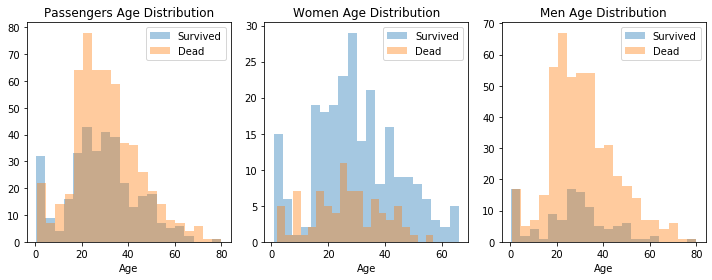

In [19]:
male = train_data[train_data['Sex']=='male']
female = train_data[train_data['Sex']=='female']

fig, (graph1, graph2, graph3) = plt.subplots(1,3, figsize = (10,4))

sns.distplot(train_data[train_data['Survived'] == 1]['Age'], bins = 20, label = 'Survived', ax = graph1, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph1, kde = False)
graph1.legend()
graph1.set_title('Passengers Age Distribution')

sns.distplot(female[female['Survived'] == 1]['Age'], bins = 20, label = 'Survived', ax = graph2, kde = False)
sns.distplot(female[female['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph2, kde = False)
graph2.legend()
graph2.set_title('Women Age Distribution')

sns.distplot(male[male['Survived'] == 1]['Age'],bins = 20, label = 'Survived', ax = graph3, kde = False)
sns.distplot(male[male['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph3, kde = False)
graph3.legend()
graph3.set_title('Men Age Distribution')

plt.tight_layout();

## Note:-
1) **Women and Children** has high survival rate as compare to **men**.<br>
2) Highest age of the person on board is **80 years** so we can divide the ages into different groups to know survival rate better in terms of ages.<br>
3) **Young** people has **high** survival rate as compare to **old** people.<br>

#### Divide the ages in 5 groups and showing their chances of their survival

In [20]:
train_data['Age_Bin'] = (train_data['Age']//20)*20
train_data[['Age_Bin', 'Survived']].groupby(['Age_Bin']).mean()

,Survived
Age_Bin,
0.0,0.447761
20.0,0.360417
40.0,0.382022
60.0,0.333333
80.0,0.500000


### 3) Gender Attribute

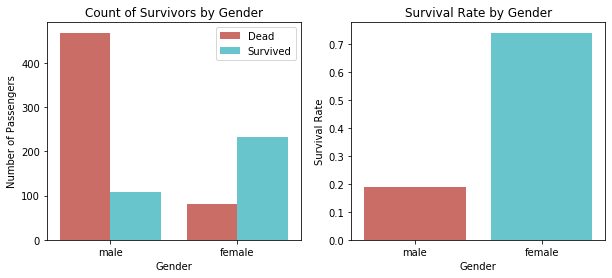

In [21]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Sex', hue = 'Survived', data = train_data,  palette = 'hls', ax = graph1) 
graph1.set_title('Count of Survivors by Gender')
graph1.set_xlabel('Gender')
graph1.set_ylabel('Number of Passengers')
graph1.legend(labels = ['Dead', 'Survived']);

sns.barplot(x = 'Sex', y = 'Survived', data = train_data,  palette = 'hls', ci = None, ax = graph2)
graph2.set_title('Survival Rate by Gender')
graph2.set_xlabel('Gender')
graph2.set_ylabel('Survival Rate');

In [22]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


## Note:- 
**Women and children has high survival rate** as they follow **women and children first** protocol.

## 4) Embarkation

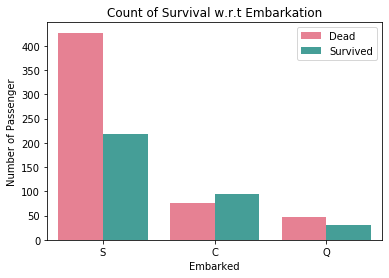

In [23]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data,  palette = 'husl') 
plt.ylabel('Number of Passenger')
plt.title('Count of Survival w.r.t Embarkation')
plt.legend(['Dead', 'Survived']);

## 5) Fare

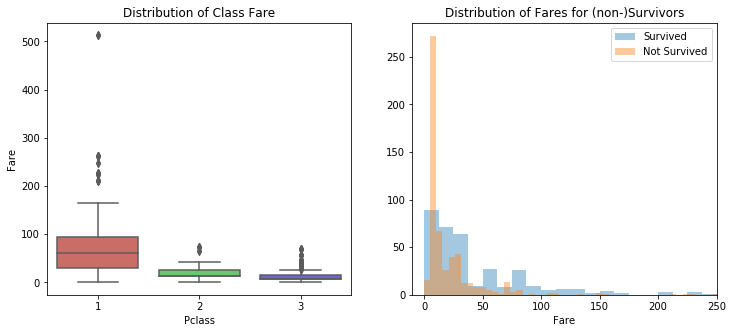

In [24]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(x = 'Pclass', y = 'Fare', data = train_data, palette = 'hls', ax = graph1)
graph1.set_title('Distribution of Class Fare')

sns.distplot(train_data[train_data['Survived'] == 1]['Fare'], label = 'Survived', ax = graph2, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Fare'], label = 'Not Survived', ax = graph2, kde = False)
graph2.set_title('Distribution of Fares for (non-)Survivors')
graph2.set_xlim([-10, 250])
graph2.legend();

In [25]:
train_data['Fare_Bin'] = pd.qcut(train_data['Fare'], 10)
train_data[['Fare_Bin', 'Survived']].groupby(['Fare_Bin']).mean()

,Survived
Fare_Bin,
"(-0.001, 7.55]",0.141304
"(7.55, 7.854]",0.298851
"(7.854, 8.05]",0.179245
"(8.05, 10.5]",0.230769
"(10.5, 14.454]",0.428571
"(14.454, 21.679]",0.420455
"(21.679, 27.0]",0.516854
"(27.0, 39.688]",0.373626
"(39.688, 77.958]",0.528090


## 6)Parch and SibSp

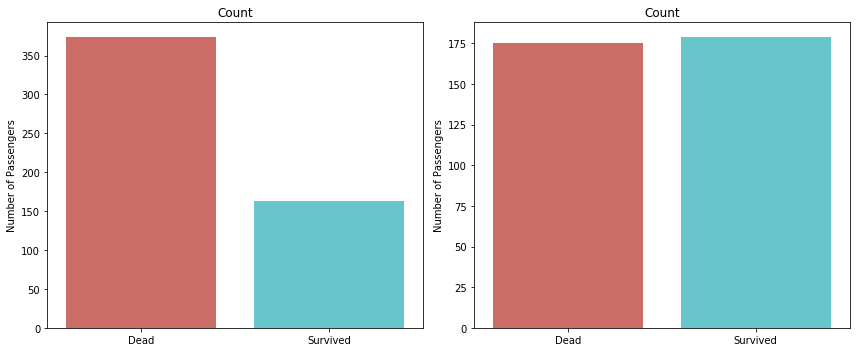

In [26]:
alone = train_data[(train_data['SibSp'] == 0) & (train_data['Parch'] == 0)]
not_alone = train_data[(train_data['SibSp'] != 0) | (train_data['Parch'] != 0)]

fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Survived', data = alone,  palette = 'hls', ax = graph1) 
graph1.set_title('Count')
graph1.set_xlabel('')
graph1.set_xticklabels(['Dead', 'Survived'])
graph1.set_ylabel('Number of Passengers')

sns.countplot(x = 'Survived', data = not_alone,  palette = 'hls', ax = graph2) 
graph2.set_title('Count')
graph2.set_xlabel('')
graph2.set_xticklabels(['Dead', 'Survived'])
graph2.set_ylabel('Number of Passengers')

plt.tight_layout();

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


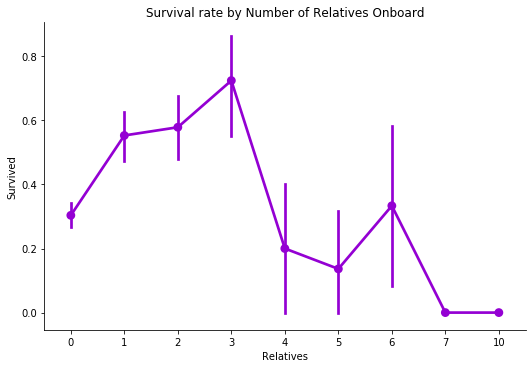

In [27]:
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
sns.factorplot('Relatives', 'Survived', data = train_data, color = 'darkviolet', aspect = 1.5)
plt.title('Survival rate by Number of Relatives Onboard');

Having 1-3 relatives, **increases** the chances of survival

In [28]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'],'Rare Title', inplace = True)
train_data['Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

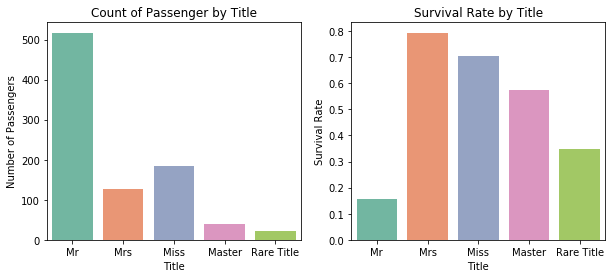

In [29]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Title', data = train_data,  palette = 'Set2', ax = graph1)
graph1.set_title('Count of Passenger by Title')
graph1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Title', y = 'Survived', data = train_data,  palette = 'Set2', ci = None, ax = graph2)
graph2.set_title('Survival Rate by Title')
graph2.set_ylabel('Survival Rate');

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin,Relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,20.0,"(-0.001, 7.55]",1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20.0,"(39.688, 77.958]",1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,20.0,"(7.854, 8.05]",0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20.0,"(39.688, 77.958]",1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,20.0,"(7.854, 8.05]",0,Mr


# Summary

In [31]:
Summary = pd.DataFrame({'Columns': ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
                        'Important': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No']})
Summary

,Columns,Important
0,Pclass,Yes
1,Name,Yes
2,Sex,Yes
3,Age,Yes
4,SibSp,Yes
5,Parch,Yes
6,Ticket,Yes
7,Fare,Yes
8,Cabin,No
9,Embarked,No


## Model Building

In [32]:
frames = [train_data, test_data]

data = pd.concat(frames)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
data.shape

(1309, 16)

In [34]:
data['Age'] = data['Age'].fillna(train_data['Age'].median())
data['Fare'] = data['Fare'].fillna(train_data['Fare'].median())

In [35]:
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ',')[0])
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

default_sr_value = 0.5
data['Family_Survival'] = default_sr_value

for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1): 
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

for _, grp_df in data.groupby('Ticket'):
    
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0
                    

data['Age_Bin'] = (data['Age']//15)*15
data['Fare_Bin'] = pd.qcut(data['Fare'], 5)
data['Relatives'] = data['SibSp'] + data['Parch']

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'}, inplace = True)
data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'],
                           'Rare Title', inplace = True)    


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Fare_Bin'] = le.fit_transform(data['Fare_Bin'])
data['Age_Bin'] = le.fit_transform(data['Age_Bin'])
data['Title_Bin'] = le.fit_transform(data['Title'])
data['Sex'] = le.fit_transform(data['Sex'])

In [37]:
data.head(2)

,Age,Age_Bin,Cabin,Embarked,Fare,Fare_Bin,Name,Parch,PassengerId,Pclass,Relatives,Sex,SibSp,Survived,Ticket,Title,Last_Name,Family_Survival,Title_Bin
0,22.0,1,C85,S,7.2500,0,"Braund, Mr. Owen Harris",0,1,3,1,1,1,0.0,A/5 21171,Mr,Braund,0.5,2
1,38.0,2,C85,C,71.2833,4,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,0,1,1.0,PC 17599,Mrs,Cumings,0.5,3


In [38]:
data.drop(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'SibSp', 'Ticket', 'Title', 'Last_Name', ], axis = 1, inplace = True)
data.head()

,Age_Bin,Fare_Bin,Pclass,Relatives,Sex,Survived,Family_Survival,Title_Bin
0,1,0,3,1,1,0.0,0.5,2
1,2,4,1,1,0,1.0,0.5,3
2,1,1,3,0,0,1.0,0.5,1
3,2,4,1,1,0,1.0,0.0,3
4,2,1,3,0,1,0.0,0.5,2


In [39]:
train_data = data[:891]

X_train = train_data.drop('Survived', 1)
y_train = train_data['Survived']


test_data = data[891:]

X_test = test_data.copy()
X_test.drop('Survived', axis = 1, inplace = True)

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)  
X_test_scaled = std_scaler.transform(X_test)        


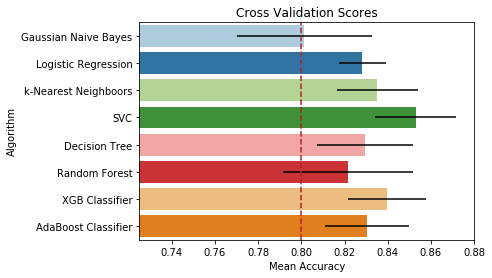

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

random_state = 1

clf_list = [GaussianNB(), 
            LogisticRegression(random_state = random_state),
            KNeighborsClassifier(), 
            SVC(random_state = random_state, probability = True),
            DecisionTreeClassifier(random_state = random_state), 
            RandomForestClassifier(random_state = random_state),
            XGBClassifier(random_state = random_state), 
            AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state), random_state = random_state)]

cv_base_mean, cv_std = [], []
for clf in clf_list:  
    
    cv = cross_val_score(clf, X_train_scaled, y = y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
    
    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

cv_total = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes', 'Logistic Regression', 'k-Nearest Neighboors', 'SVC', 'Decision Tree', 'Random Forest', 'XGB Classifier', 'AdaBoost Classifier'],
                         'CV-Means': cv_base_mean, 
                         'CV-Errors': cv_std})

sns.barplot('CV-Means', 'Algorithm', data = cv_total, palette = 'Paired', orient = 'h', **{'xerr': cv_std})
plt.xlabel('Mean Accuracy')
plt.title('Cross Validation Scores')
plt.xlim([0.725, 0.88])
plt.axvline(x = 0.80, color = 'firebrick', linestyle = '--');

### SVC is best for prediction according to above result

In [42]:
from sklearn.ensemble import VotingClassifier

estimators = [('gnb', clf_list[0]), ('lr', clf_list[1]),
              ('knn', clf_list[2]), ('svc', clf_list[3]),
              ('dt', clf_list[4]), ('rf', clf_list[5]),
              ('xgb', clf_list[6]), ('ada', clf_list[7])]

base_voting_hard = VotingClassifier(estimators = estimators , voting = 'hard')
base_voting_soft = VotingClassifier(estimators = estimators , voting = 'soft') 

cv_hard = cross_val_score(base_voting_hard, X_train_scaled, y_train, cv = 5)
cv_soft = cross_val_score(base_voting_soft, X_train_scaled, y_train, cv = 5)

print ('Baseline Models - Ensemble\n--------------------------')
print ('Hard Voting: {}%'.format(np.round(cv_hard.mean()*100, 1)))
print ('Soft Voting: {}%'.format(np.round(cv_soft.mean()*100, 1)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[12:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Baseline Models - Ensemble
--------------------------
Hard Voting: 84.2%
Soft Voting: 82.6%


#### Above output
Hard Voting: 84.2%<br>
Soft Voting: 82.6%

In [43]:
base_voting_hard.fit(X_train_scaled, y_train)
base_voting_soft.fit(X_train_scaled, y_train)

y_pred_base_hard = base_voting_hard.predict(X_test_scaled)
y_pred_base_soft = base_voting_hard.predict(X_test_scaled)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
cv_means_tuned = [np.nan]

def clf_performance(classifier, model_name):
    print(model_name)
    print('-------------------------------')
    print('   Best Score: ' + str(classifier.best_score_))
    print('   Best Parameters: ' + str(classifier.best_params_))
    
    cv_means_tuned.append(classifier.best_score_)

In [46]:
from sklearn.model_selection import GridSearchCV

svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 
                                  'gamma': [0.01, 0.1, 0.5, 1, 2, 5],
                                  'C': [.1, 1, 2, 5]},
                                 {'kernel': ['linear'], 
                                  'C': [.1, 1, 2, 10]},
                                 {'kernel': ['poly'], 
                                  'degree' : [2, 3, 4, 5], 
                                  'C': [.1, 1, 10]}]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s


SVC
-------------------------------
   Best Score: 0.8529741863075196
   Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


In [54]:
best_svc = best_clf_svc.best_estimator_

estimators = [('svc', best_svc)]

tuned_voting_hard = VotingClassifier(estimators = estimators, voting = 'hard', n_jobs = -1)
tuned_voting_soft = VotingClassifier(estimators = estimators, voting = 'soft', n_jobs = -1)

tuned_voting_hard.fit(X_train_scaled, y_train)
tuned_voting_soft.fit(X_train_scaled, y_train)

cv_hard = cross_val_score(tuned_voting_hard, X_train_scaled, y_train, cv = 5)
cv_soft = cross_val_score(tuned_voting_soft, X_train_scaled, y_train, cv = 5)

print ('Hard Voting: {}%'.format(np.round(cv_hard.mean()*100, 2)))
print ('Soft Voting: {}%'.format(np.round(cv_soft.mean()*100, 2)))

y_pred_tuned_hd = tuned_voting_hard.predict(X_test_scaled).astype(int)
y_pred_tuned_sf = tuned_voting_soft.predict(X_test_scaled).astype(int)

Hard Voting: 85.3%
Soft Voting: 85.41%


In [61]:
test_df = pd.DataFrame(pd.read_csv('test.csv')['PassengerId'])

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_base_hard.astype(int)}).to_csv('01-Baseline_Hard_voting.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_base_soft.astype(int)}).to_csv('02-Baseline_Soft_voting.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_tuned_hd.astype(int)}).to_csv('Submission.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_tuned_sf.astype(int)}).to_csv('04-Tuned_Soft_Voting.csv', index = False)